In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# use paper style
style = "/home/gleung/scripts/styles/bee-paperlight.mplstyle"
# style = '/home/gleung/scripts/styles/bee-presentationtransparent.mplstyle'
plt.style.use(style)

# set default font
font_dir = ["/home/gleung/scripts/futura"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams["font.family"] = "Futura"

# palettable default colors
from palettable.cmocean.sequential import Matter_10

rainbow = Matter_10.mpl_colors[1:]

gray = "#303039"
bg = "white"
lcol = "black"

In [3]:
import os
import pandas as pd
import numpy as np

# Task 1

In [4]:
Cs = [
    0.001,
    0.01,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    1.0,
    1.1,
]
wvlngths = [2, 4, 10, 20]

## LF-2SP

In [117]:
def error_lf2sp(C, wvlngth):

    k = 2 * np.pi / wvlngth
    alpha = 2 * C * np.sin(k)

    if alpha**2 <= 4:
        rl = np.sqrt(4 - alpha**2) / 2
        im = -alpha / 2
        return ((rl**2 + im**2) ** (1 / 2), -(1 / (k * C)) * np.arcsin(im))

    else:
        return (np.nan, np.nan)


error_lf2sp = np.vectorize(error_lf2sp)

In [64]:
out = pd.DataFrame(
    index=pd.MultiIndex.from_product([Cs, wvlngths], names=["C", "w"])
).reset_index()

out["amp"], out["phs"] = error_lf2sp(out.C, out.w)

In [65]:
print("Amplitude")
print(
    out.pivot(index="w", columns="C", values="amp").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)
print("")
print("Phase Speed")
print(
    out.pivot(index="w", columns="C", values="phs").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)

Amplitude
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.75 |   0.76 |   0.77 |   0.8 |   0.9 |   1.0 |     1.1 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|-------:|-------:|-------:|------:|------:|------:|--------:|
|   2 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |  1.000 |  1.000 |  1.000 | 1.000 | 1.000 | 1.000 |   1.000 |
|   3 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |  1.000 |  1.000 |  1.000 | 1.000 | 1.000 | 1.000 |   1.000 |
|   4 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |  1.000 |  1.000 |  1.000 | 1.000 | 1.000 | 1.000 | nan     |
|   5 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |  1.000 |  1.000 |  1.000 | 1.000 | 1.000 | 1.000 | nan     |
|  10 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |  1.000 |  1.000 |  1.000 | 1.000 | 1.000 | 

## LF-4SP

In [116]:
def error_lf4sp(C, wvlngth):

    k = 2 * np.pi / wvlngth
    alpha = (C / 3) * ((8 * np.sin(k)) - np.sin(2 * k))

    if (alpha**2) <= 4:
        rl = np.sqrt(4 - alpha**2) / 2
        im = -alpha / 2
        return ((rl**2 + im**2) ** (1 / 2), -(1 / (k * C)) * np.arcsin(im))

    else:
        return (np.nan, np.nan)


error_lf4sp = np.vectorize(error_lf4sp)

In [67]:
out = pd.DataFrame(
    index=pd.MultiIndex.from_product([Cs, wvlngths], names=["C", "w"])
).reset_index()

out["amp"], out["phs"] = error_lf4sp(out.C, out.w)

print("Amplitude")
print(
    out.pivot(index="w", columns="C", values="amp").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)
print("")
print("Phase Speed")
print(
    out.pivot(index="w", columns="C", values="phs").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)

Amplitude
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.75 |    0.76 |    0.77 |     0.8 |     0.9 |     1.0 |     1.1 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|-------:|--------:|--------:|--------:|--------:|--------:|--------:|
|   2 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |  1.000 |   1.000 |   1.000 |   1.000 |   1.000 |   1.000 |   1.000 |
|   3 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |  1.000 |   1.000 | nan     | nan     | nan     | nan     | nan     |
|   4 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |  1.000 | nan     | nan     | nan     | nan     | nan     | nan     |
|   5 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |  1.000 |   1.000 |   1.000 |   1.000 | nan     | nan     | nan     |
|  10 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.0

## Compare

In [119]:
lf2 = pd.DataFrame(
    index=pd.MultiIndex.from_product([Cs, wvlngths], names=["C", "w"])
).reset_index()

lf2["amp"], lf2["phs"] = error_lf2sp(lf2.C, lf2.w)

lf4 = pd.DataFrame(
    index=pd.MultiIndex.from_product([Cs, wvlngths], names=["C", "w"])
).reset_index()

lf4["amp"], lf4["phs"] = error_lf4sp(lf4.C, lf4.w)

### Amplitude

In [120]:
print("LF-2SP")
print(
    lf2.pivot(index="w", columns="C", values="amp")
    .replace(np.nan, None)
    .to_markdown(
        tablefmt="pipe",
        floatfmt=".3f",
        missingval="-",
    )
)

print("")

print("LF-4SP")
print(
    lf4.pivot(index="w", columns="C", values="amp")
    .replace(np.nan, None)
    .to_markdown(
        tablefmt="pipe",
        floatfmt=".3f",
        missingval="-",
    )
)

LF-2SP
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |   1.0 |   1.1 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|   2 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |
|   4 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | -     |
|  10 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |
|  20 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |

LF-4SP
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |   1.0 |   1.1 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|   2 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 

### Phase Speed

In [121]:
print("LF-2SP")
print(
    lf2.pivot(index="w", columns="C", values="phs")
    .replace(np.nan, None)
    .to_markdown(
        tablefmt="pipe",
        floatfmt=".3f",
        missingval="-",
    )
)

print("")

print("LF-4SP")
print(
    lf4.pivot(index="w", columns="C", values="phs")
    .replace(np.nan, None)
    .to_markdown(
        tablefmt="pipe",
        floatfmt=".3f",
        missingval="-",
    )
)

LF-2SP
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |   1.0 |   1.1 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|   2 |   0.000 |  0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
|   4 |   0.637 |  0.637 | 0.638 | 0.641 | 0.647 | 0.655 | 0.667 | 0.683 | 0.705 | 0.738 | 0.792 | 1.000 | -     |
|  10 |   0.935 |  0.935 | 0.936 | 0.938 | 0.940 | 0.944 | 0.950 | 0.956 | 0.964 | 0.974 | 0.986 | 1.000 | 1.017 |
|  20 |   0.984 |  0.984 | 0.984 | 0.984 | 0.985 | 0.986 | 0.988 | 0.989 | 0.991 | 0.994 | 0.997 | 1.000 | 1.004 |

LF-4SP
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |   1.0 |   1.1 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|   2 |   0.000 |  0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 

For small Courant numbers, the phase error is a bit better in LF-4SP. But phase error actually goes opposite (too fast rather than too slow) for higher C.

# Task 2: program linearized advection eqn

In [5]:
def calc_c(U, dt, dx):
    return U * dt / dx

In [6]:
U = 1
dx = 1
dt = 0.7

print(f"C={calc_c(U,dt,dx)}")

nx = 61  # number of x points (real points = nx-2)
nt = 1000

n = 10
k = 2 * np.pi / (n * dx)
a0 = 1

C=0.7


In [7]:
def set_up(nx, dx, k, a0):
    out = np.zeros(nx)

    for ix in range(35, 46):
        out[ix] = a0 * (1 + np.cos(ix * k * dx))

    return out

In [8]:
def tend_ftcs(phi_c):
    tend = np.zeros(len(phi_c))

    for ix in range(1, len(phi_c) - 1):
        tend[ix] = (phi_c[ix + 1] - phi_c[ix - 1]) / (2 * dx)

    return tend


def tend_lf2sp(phi_c):
    tend = np.zeros(len(phi_c))

    for ix in range(1, len(phi_c) - 1):
        tend[ix] = (phi_c[ix + 1] - phi_c[ix - 1]) / (2 * dx)

    return tend


def tend_lf4sp(phi_c):
    nx = len(phi_c)
    tend = np.zeros(nx)

    for ix in range(2, nx - 2):
        tend[ix] = ((4 / 3) * (phi_c[ix + 1] - phi_c[ix - 1]) / (2 * dx)) - (
            (1 / 3) * (phi_c[ix + 2] - phi_c[ix - 2]) / (4 * dx)
        )

    # reduce to 2nd order at boundaries
    tend[1] = (phi_c[2] - phi_c[0]) / (2 * dx)
    tend[-2] = (phi_c[-1] - phi_c[-3]) / (2 * dx)

    tend[0] = tend[nx - 2]
    tend[nx - 1] = tend[1]
    return tend


def filt_ar(phi_p, phi_c, phi_f, gamma):
    phi_c_filt = np.zeros(len(phi_c))

    for ix in range(len(phi_c)):
        phi_c_filt[ix] = phi_c[ix] + gamma * (
            phi_f[ix] - (2 * phi_c[ix]) + phi_p[ix]
        )

    return phi_c_filt

In [9]:
def model_main(nt, nx, dt, dx, U, a0, k, lforder=2, gamma_filter=None):
    # Initialize arrays
    xs = np.arange(nx)
    phi = np.empty((nt, nx))

    # initial timestep
    phi[0] = set_up(nx, dx, k, a0)

    for it in range(nt - 1):
        if it == 0:
            # forward scheme
            tend = tend_ftcs(phi[it, :])
            phi[it + 1, :] = phi[it, :] - (dt * U * tend)
        else:
            if lforder == 2:
                tend = tend_lf2sp(phi[it, :])
            elif lforder == 4:
                tend = tend_lf4sp(phi[it, :])

            phi[it + 1, :] = phi[it - 1, :] - (2 * dt * U * tend)

            if gamma_filter:
                phi[it, :] = filt_ar(
                    phi[it - 1, :],
                    phi[it, :],
                    phi[it + 1, :],
                    gamma=gamma_filter,
                )

        # apply cyclic boundary conditions
        phi[it + 1, 0] = phi[it + 1, nx - 2]
        phi[it + 1, nx - 1] = phi[it + 1, 1]

    return phi

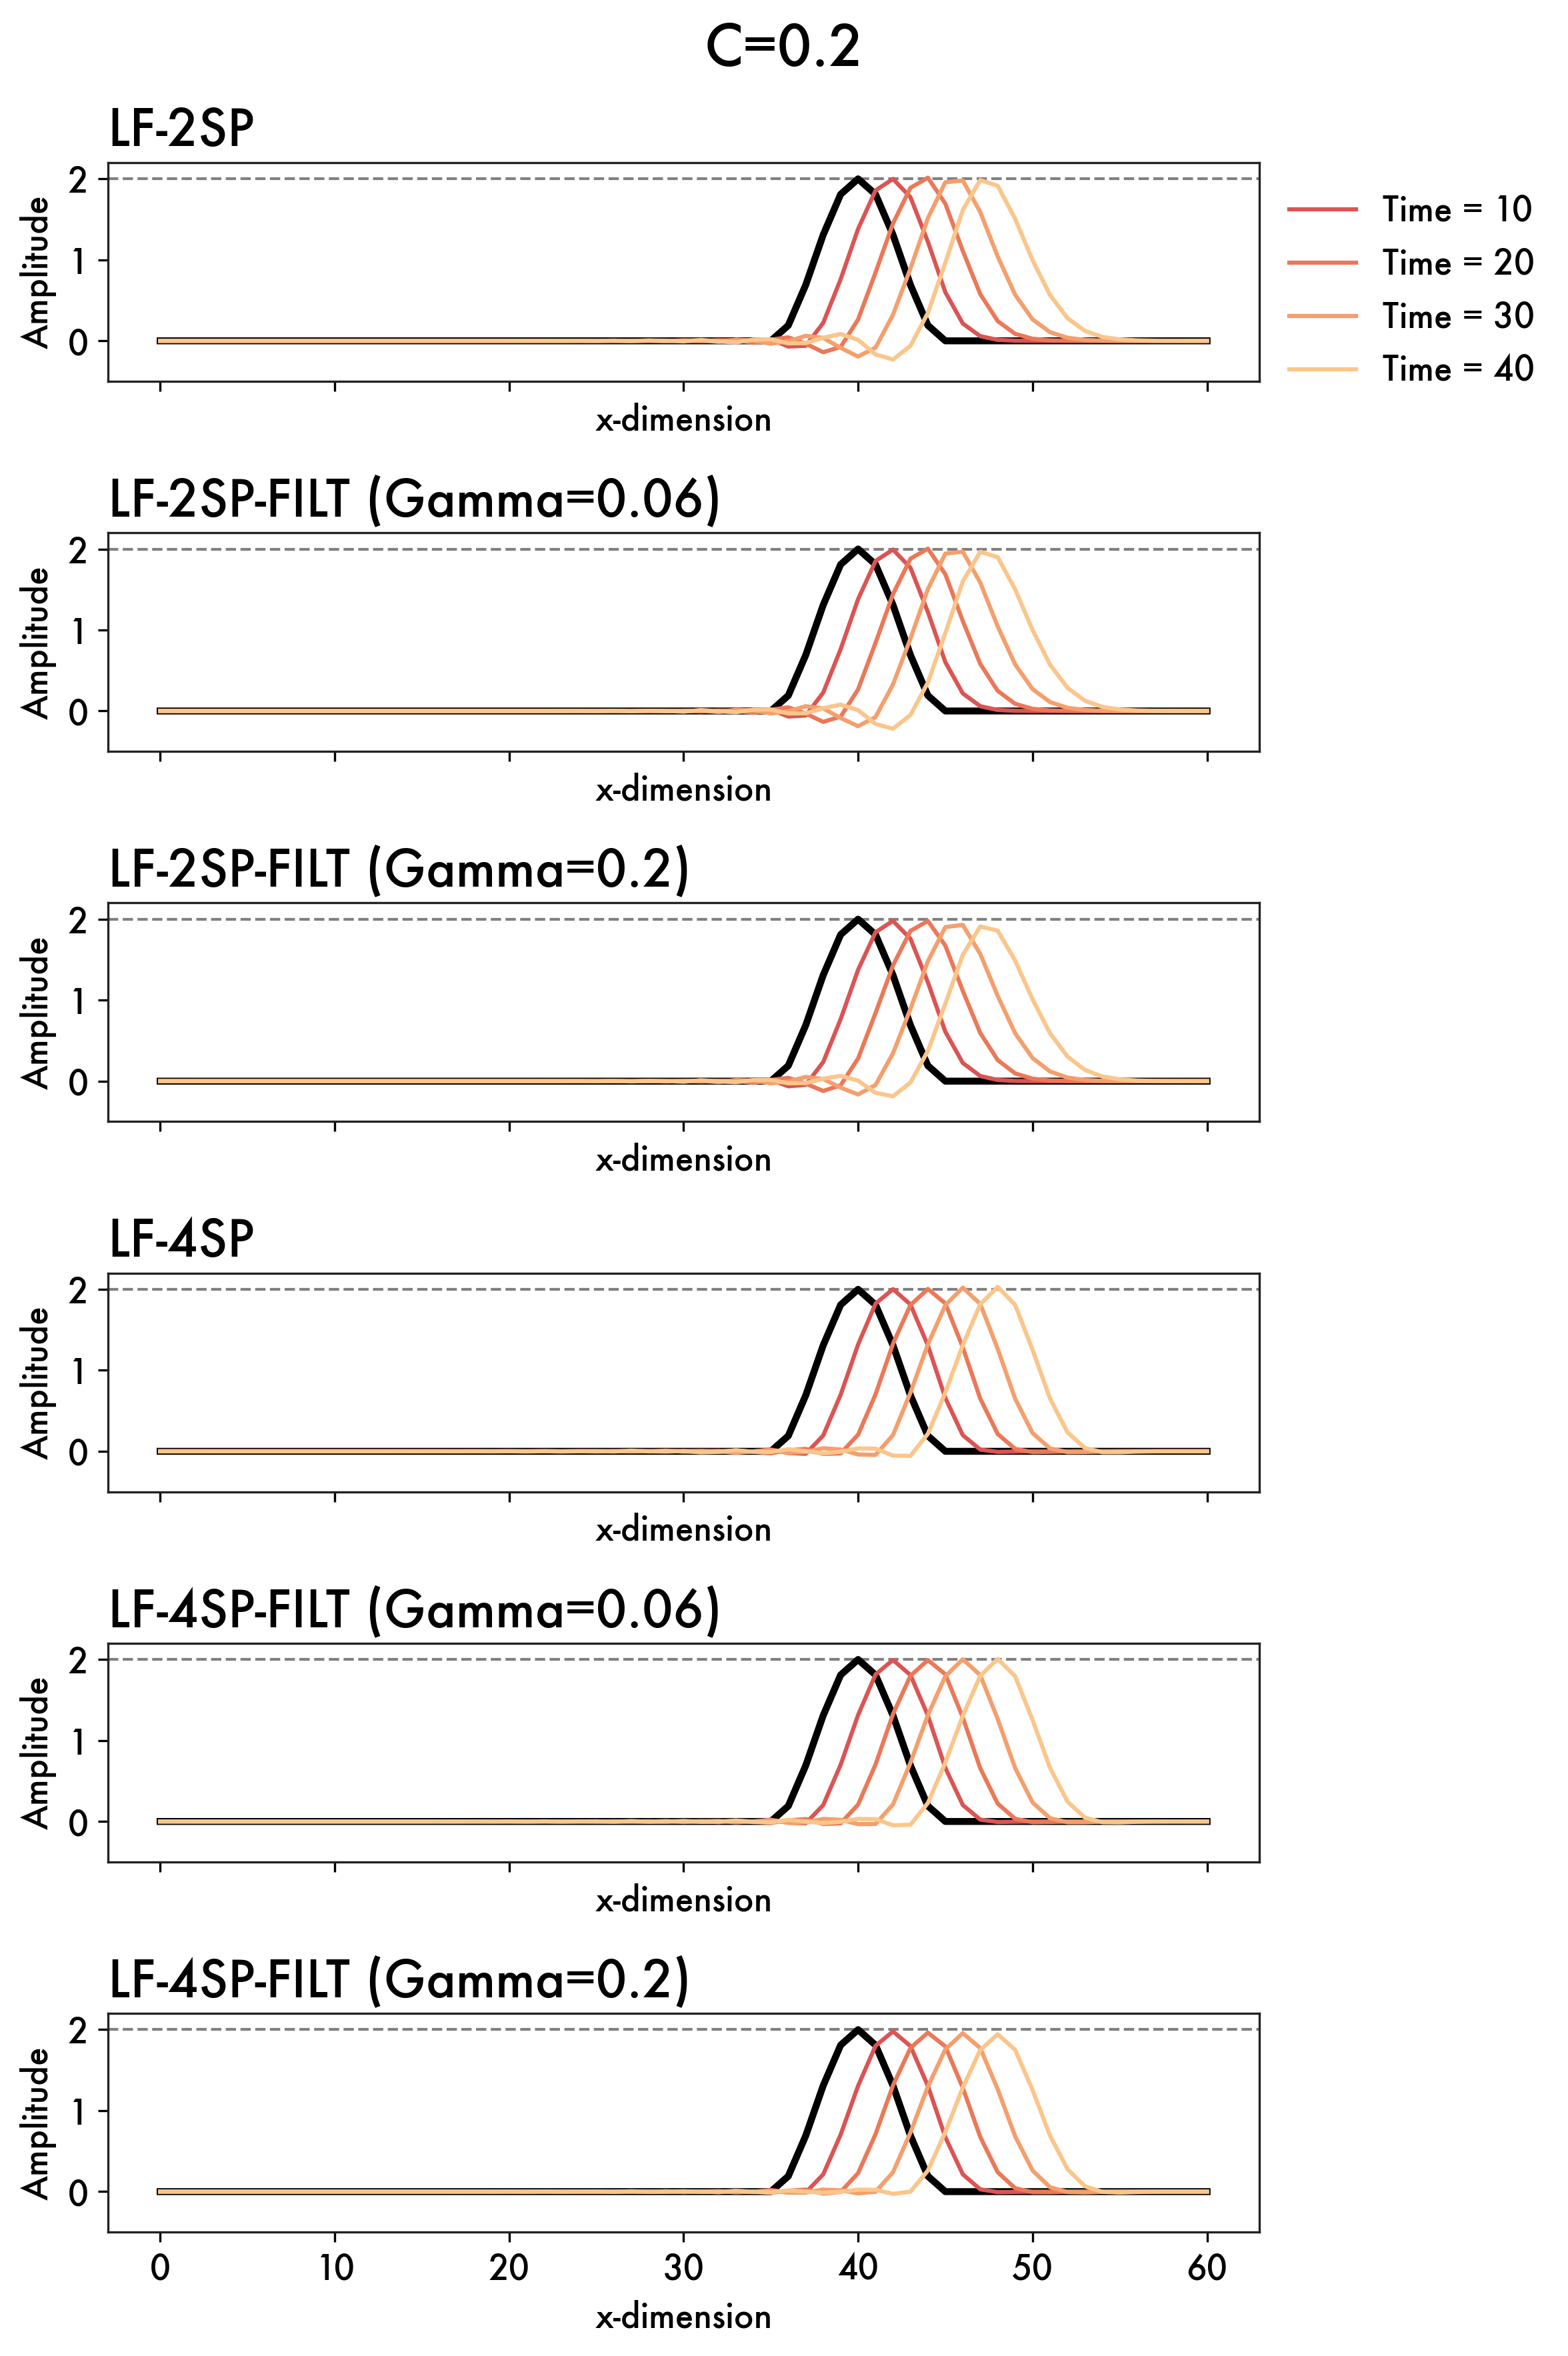

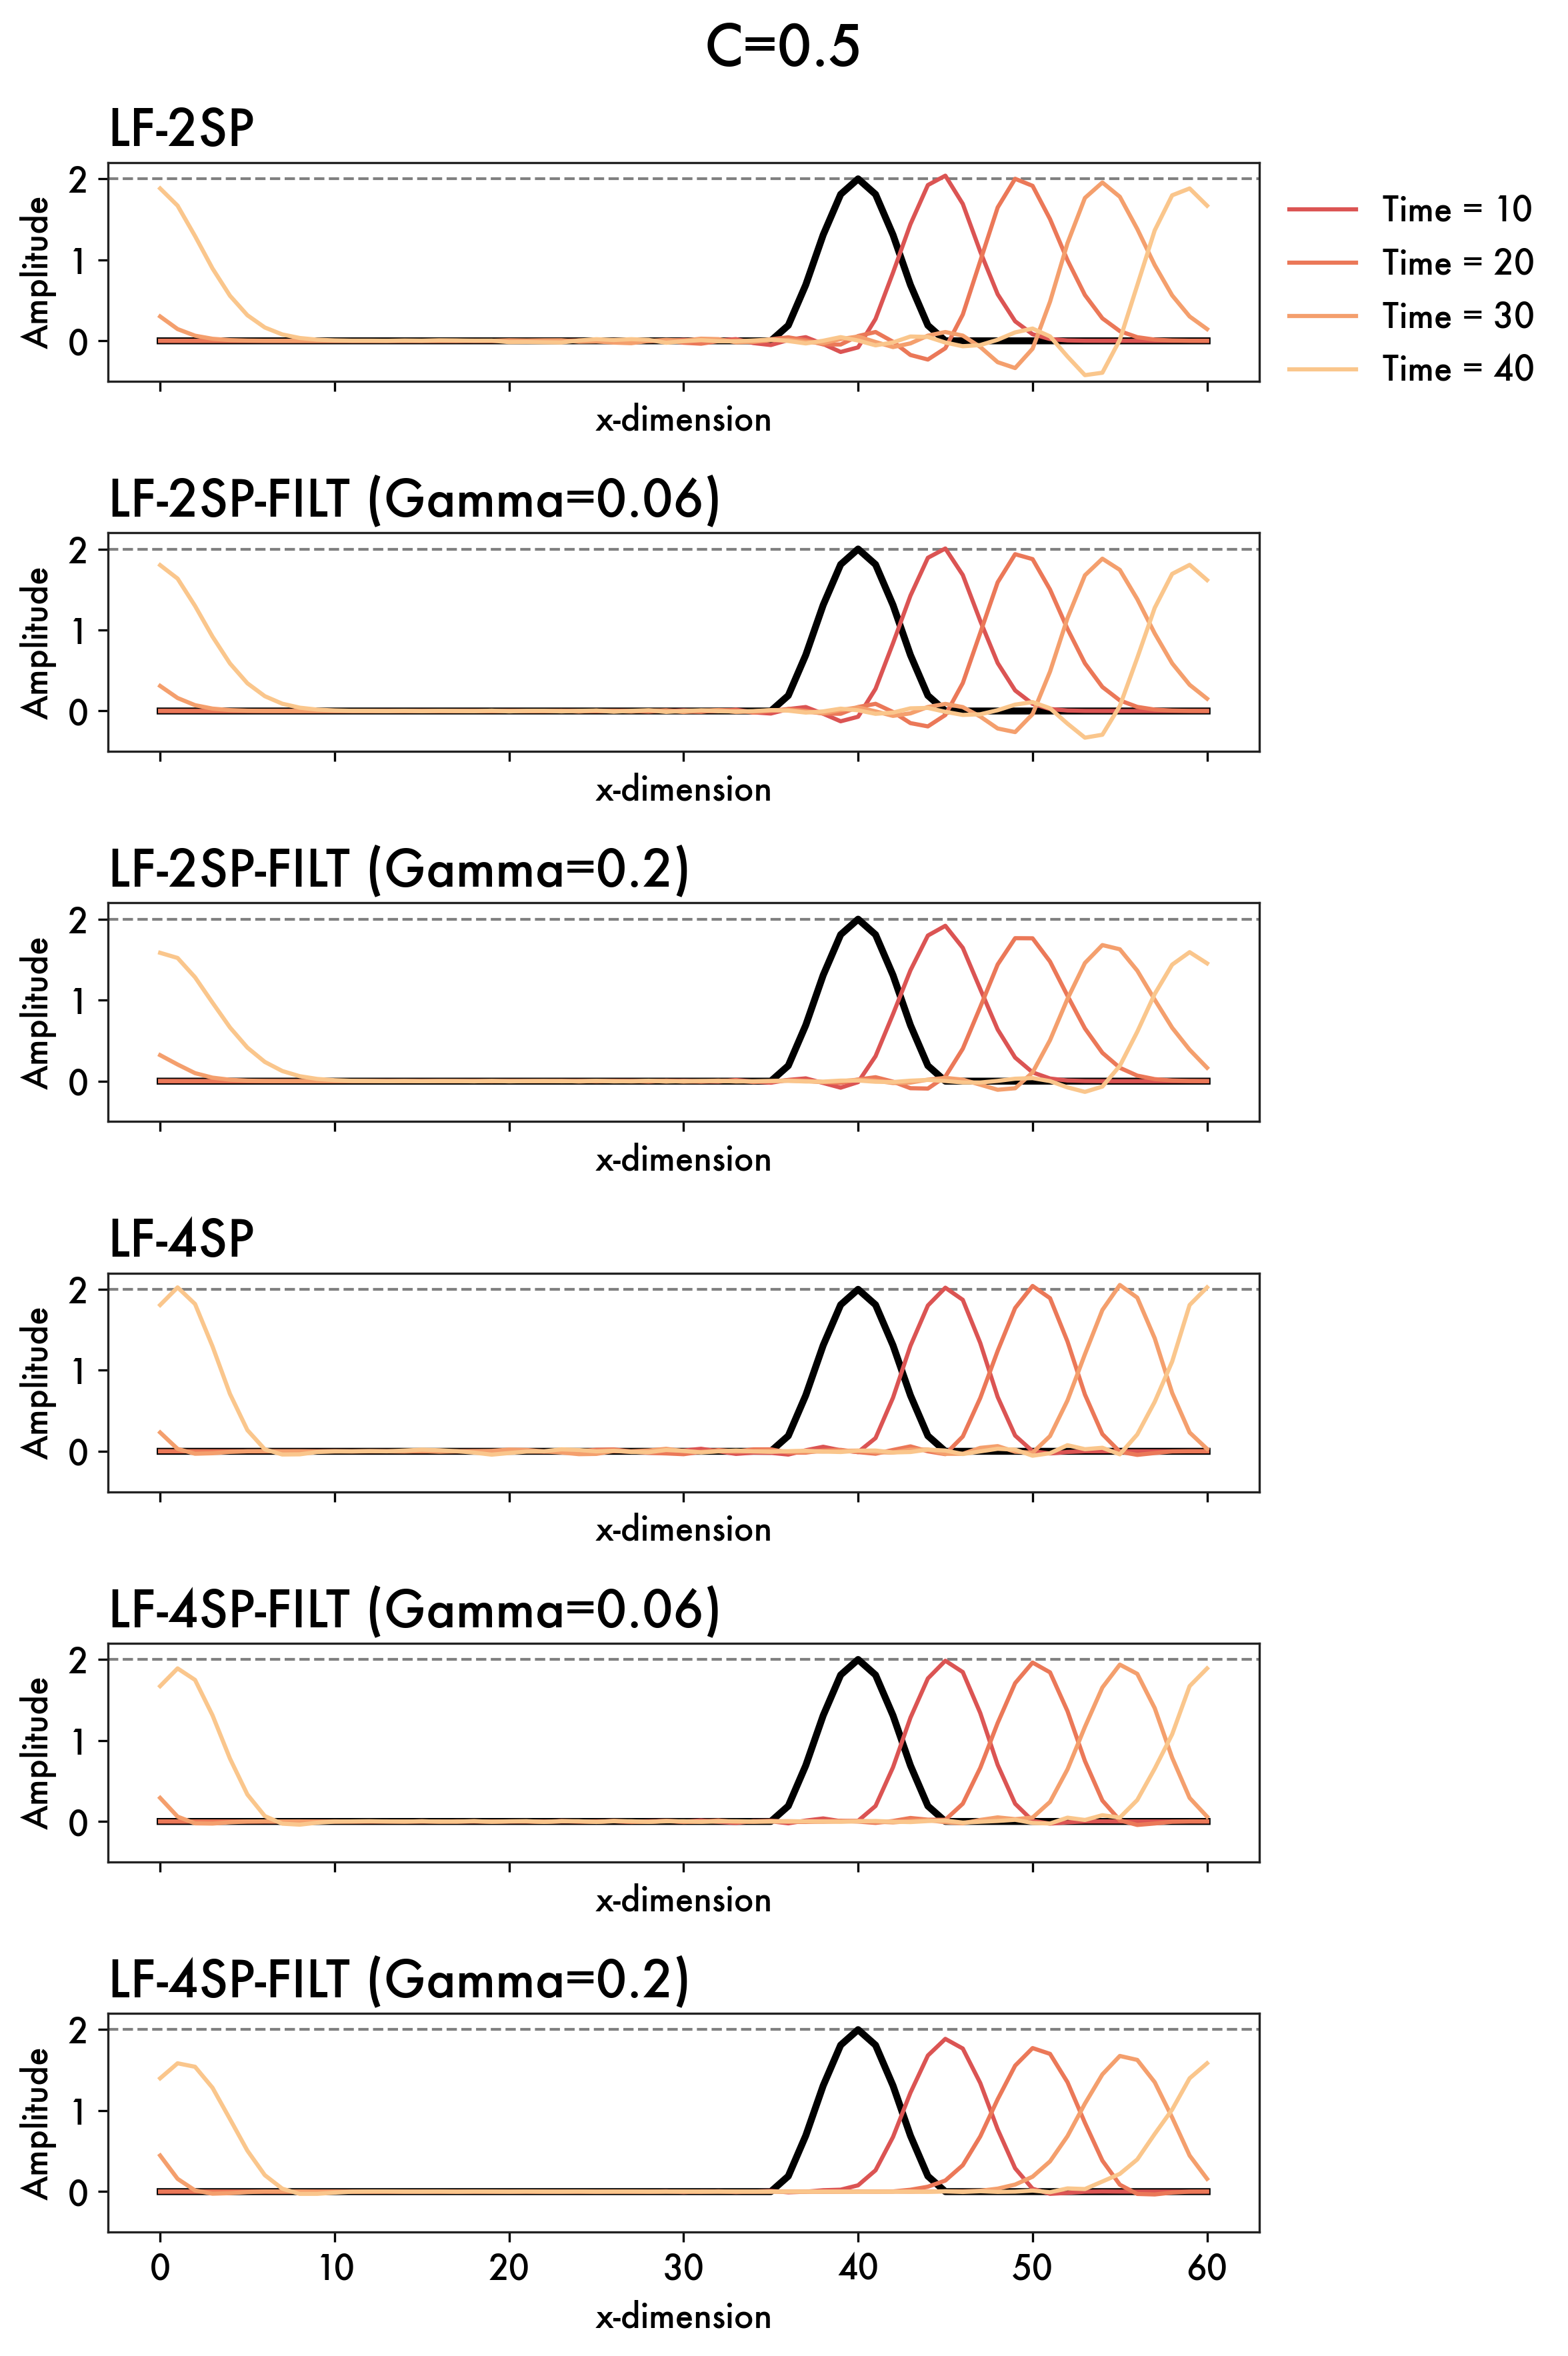

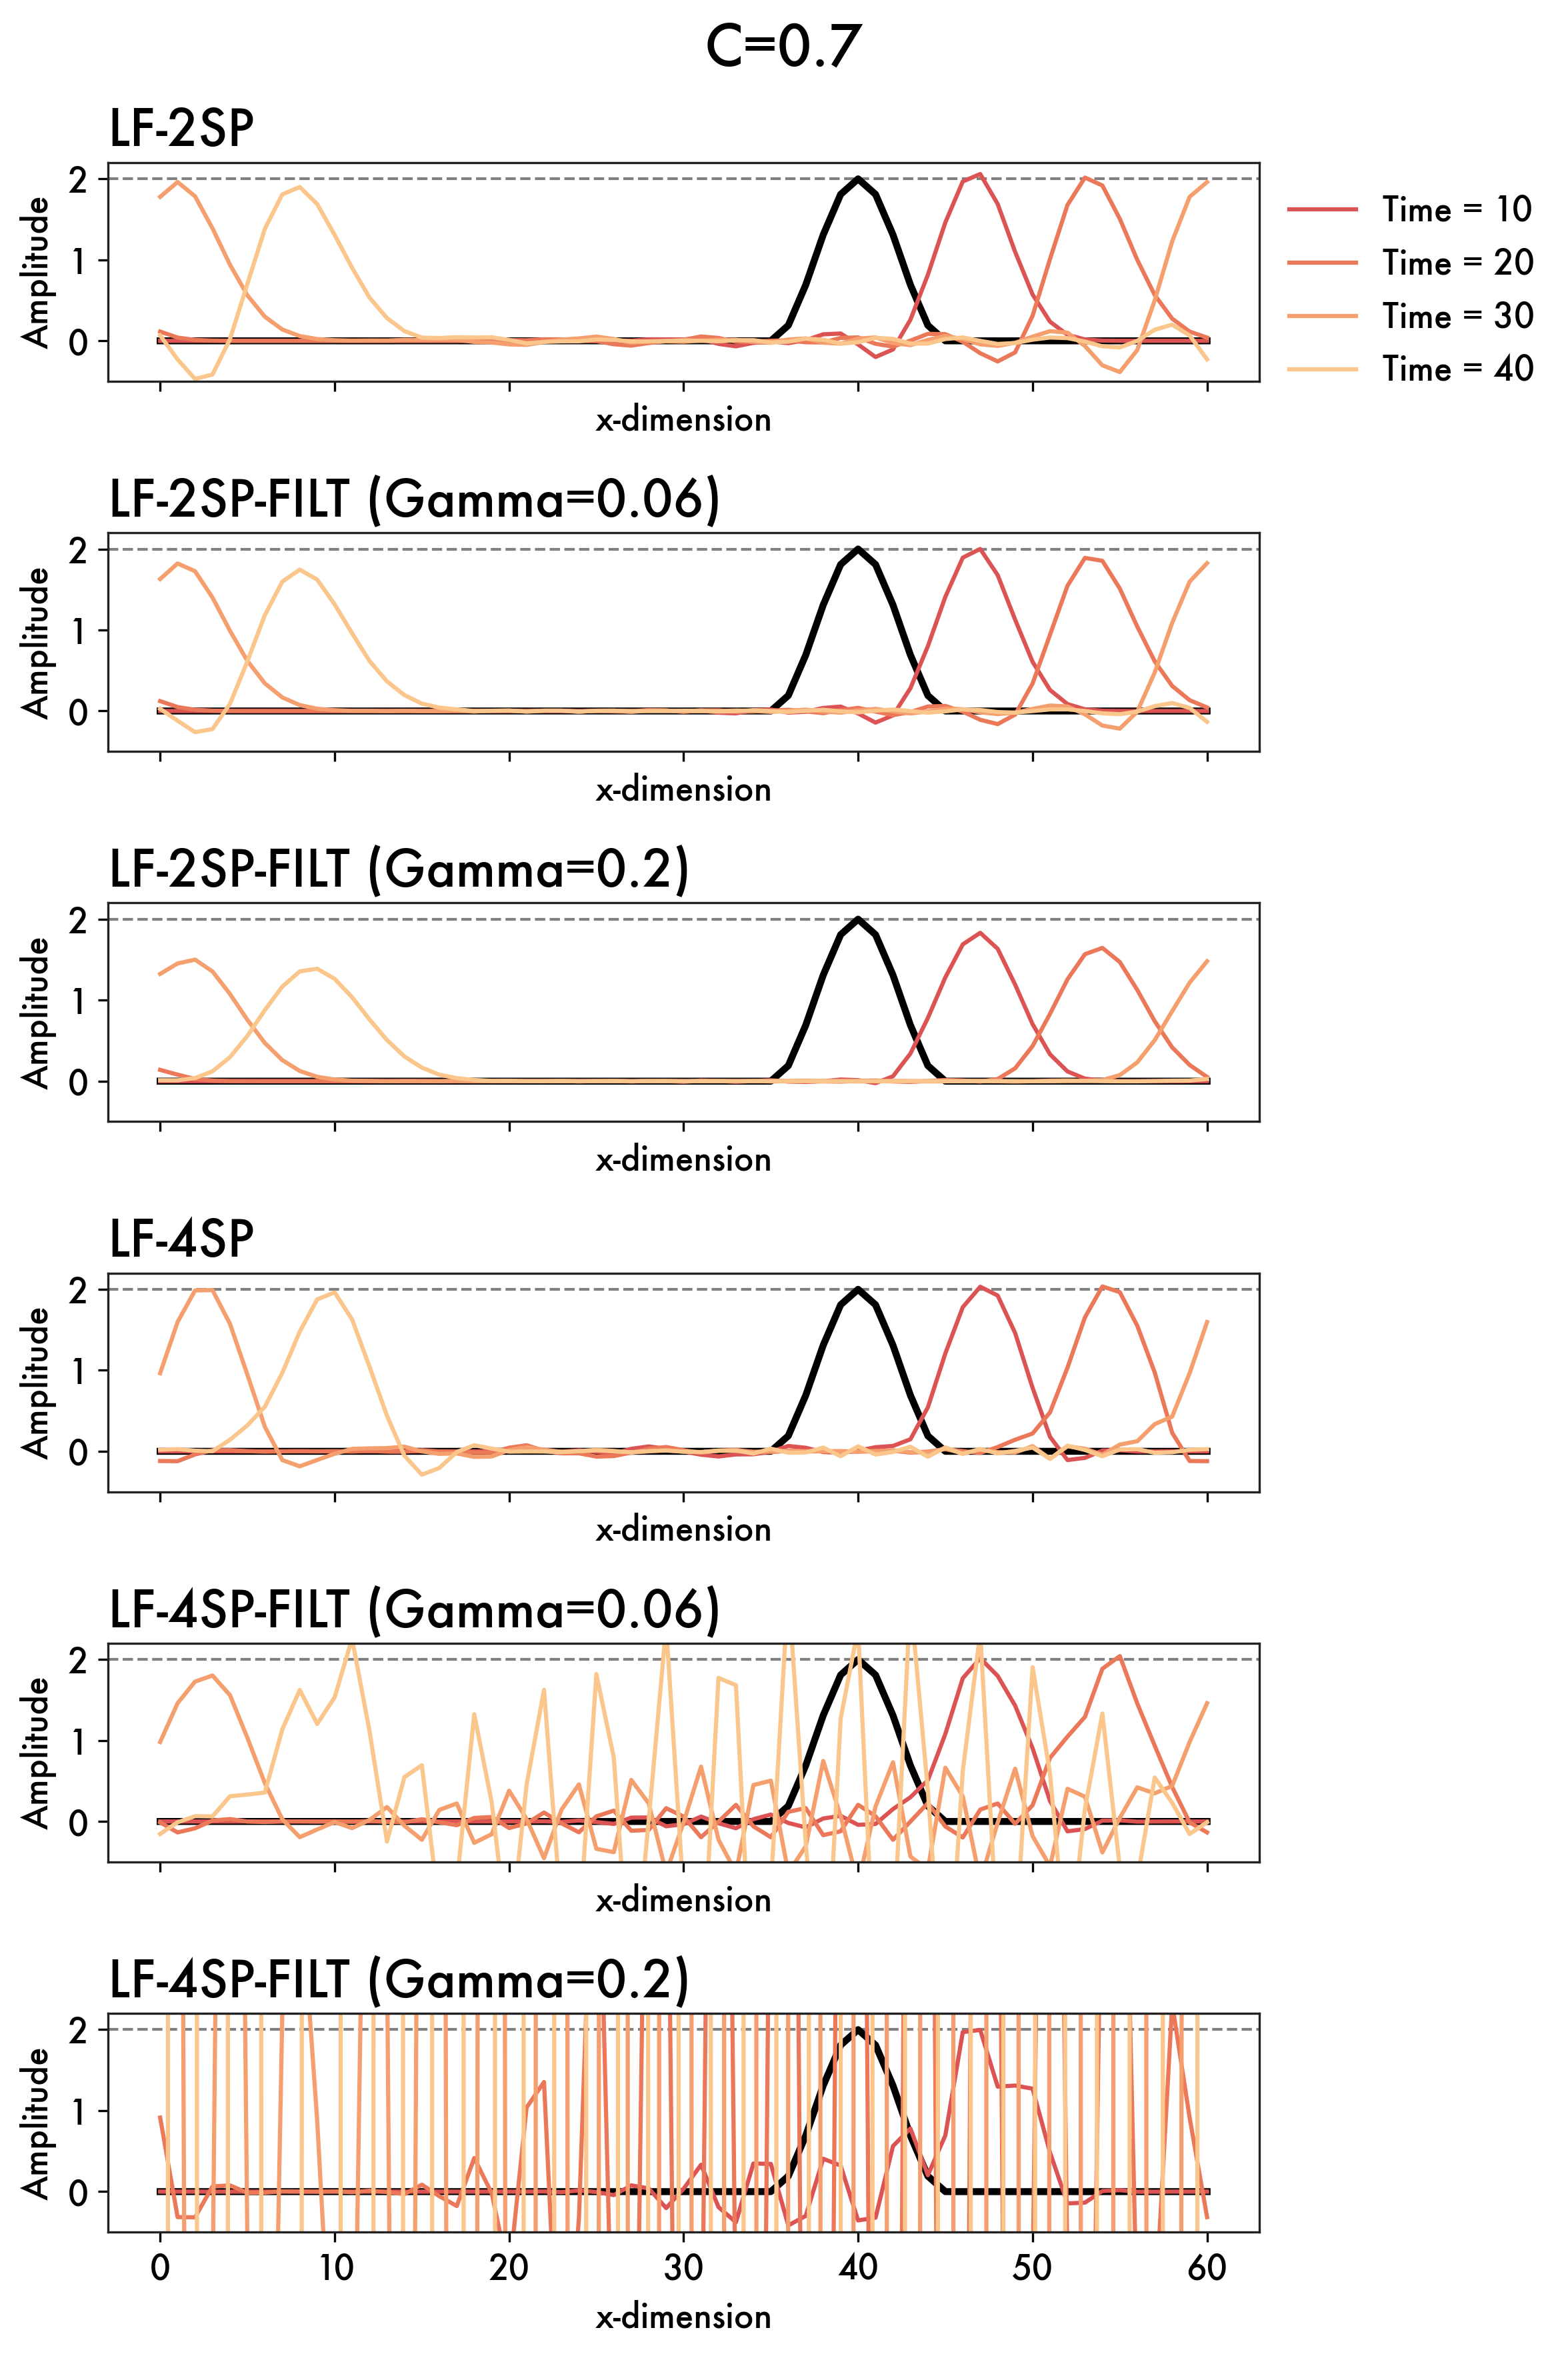

In [10]:
nt = 100
nx = 61
dt = 1
dx = 1
a0 = 1
n = 10
k = 2 * np.pi / (n * dx)
xs = np.arange(nx)

for U in [0.2, 0.5, 0.7]:
    C = calc_c(U, dt, dx)

    phi_lf2sp = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=2, gamma_filter=None
    )

    phi_lf2sp_filt_wk = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=2, gamma_filter=0.06
    )

    phi_lf2sp_filt_st = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=2, gamma_filter=0.2
    )

    phi_lf4sp = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=4, gamma_filter=None
    )

    phi_lf4sp_filt_wk = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=4, gamma_filter=0.06
    )

    phi_lf4sp_filt_st = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=4, gamma_filter=0.2
    )

    fig, axes = plt.subplots(6, 1, figsize=(8, 12), sharex=True)

    for ax, phi, title in zip(
        axes,
        [
            phi_lf2sp,
            phi_lf2sp_filt_wk,
            phi_lf2sp_filt_st,
            phi_lf4sp,
            phi_lf4sp_filt_wk,
            phi_lf4sp_filt_st,
        ],
        [
            "LF-2SP",
            "LF-2SP-FILT (Gamma=0.06)",
            "LF-2SP-FILT (Gamma=0.2)",
            "LF-4SP",
            "LF-4SP-FILT (Gamma=0.06)",
            "LF-4SP-FILT (Gamma=0.2)",
        ],
    ):
        ax.plot(xs, phi[0], color="black")

        for it, col in zip(
            [10, 20, 30, 40, 50],
            rainbow[3::-1],
        ):
            ax.plot(xs, phi[it], color=col, label=f"Time = {it}", linewidth=1.5)

        ax.set_xlabel("x-dimension")
        ax.set_ylabel("Amplitude")

        ax.set_title(title)
        ax.set_ylim(-0.5, 2.2)

        ax.axhline(2, ls="--", color="gray", lw=1, zorder=0)

    axes[0].legend(bbox_to_anchor=(1, 1))

    plt.suptitle(f"C={C}", fontsize=20)
    plt.show()
    plt.close("all")

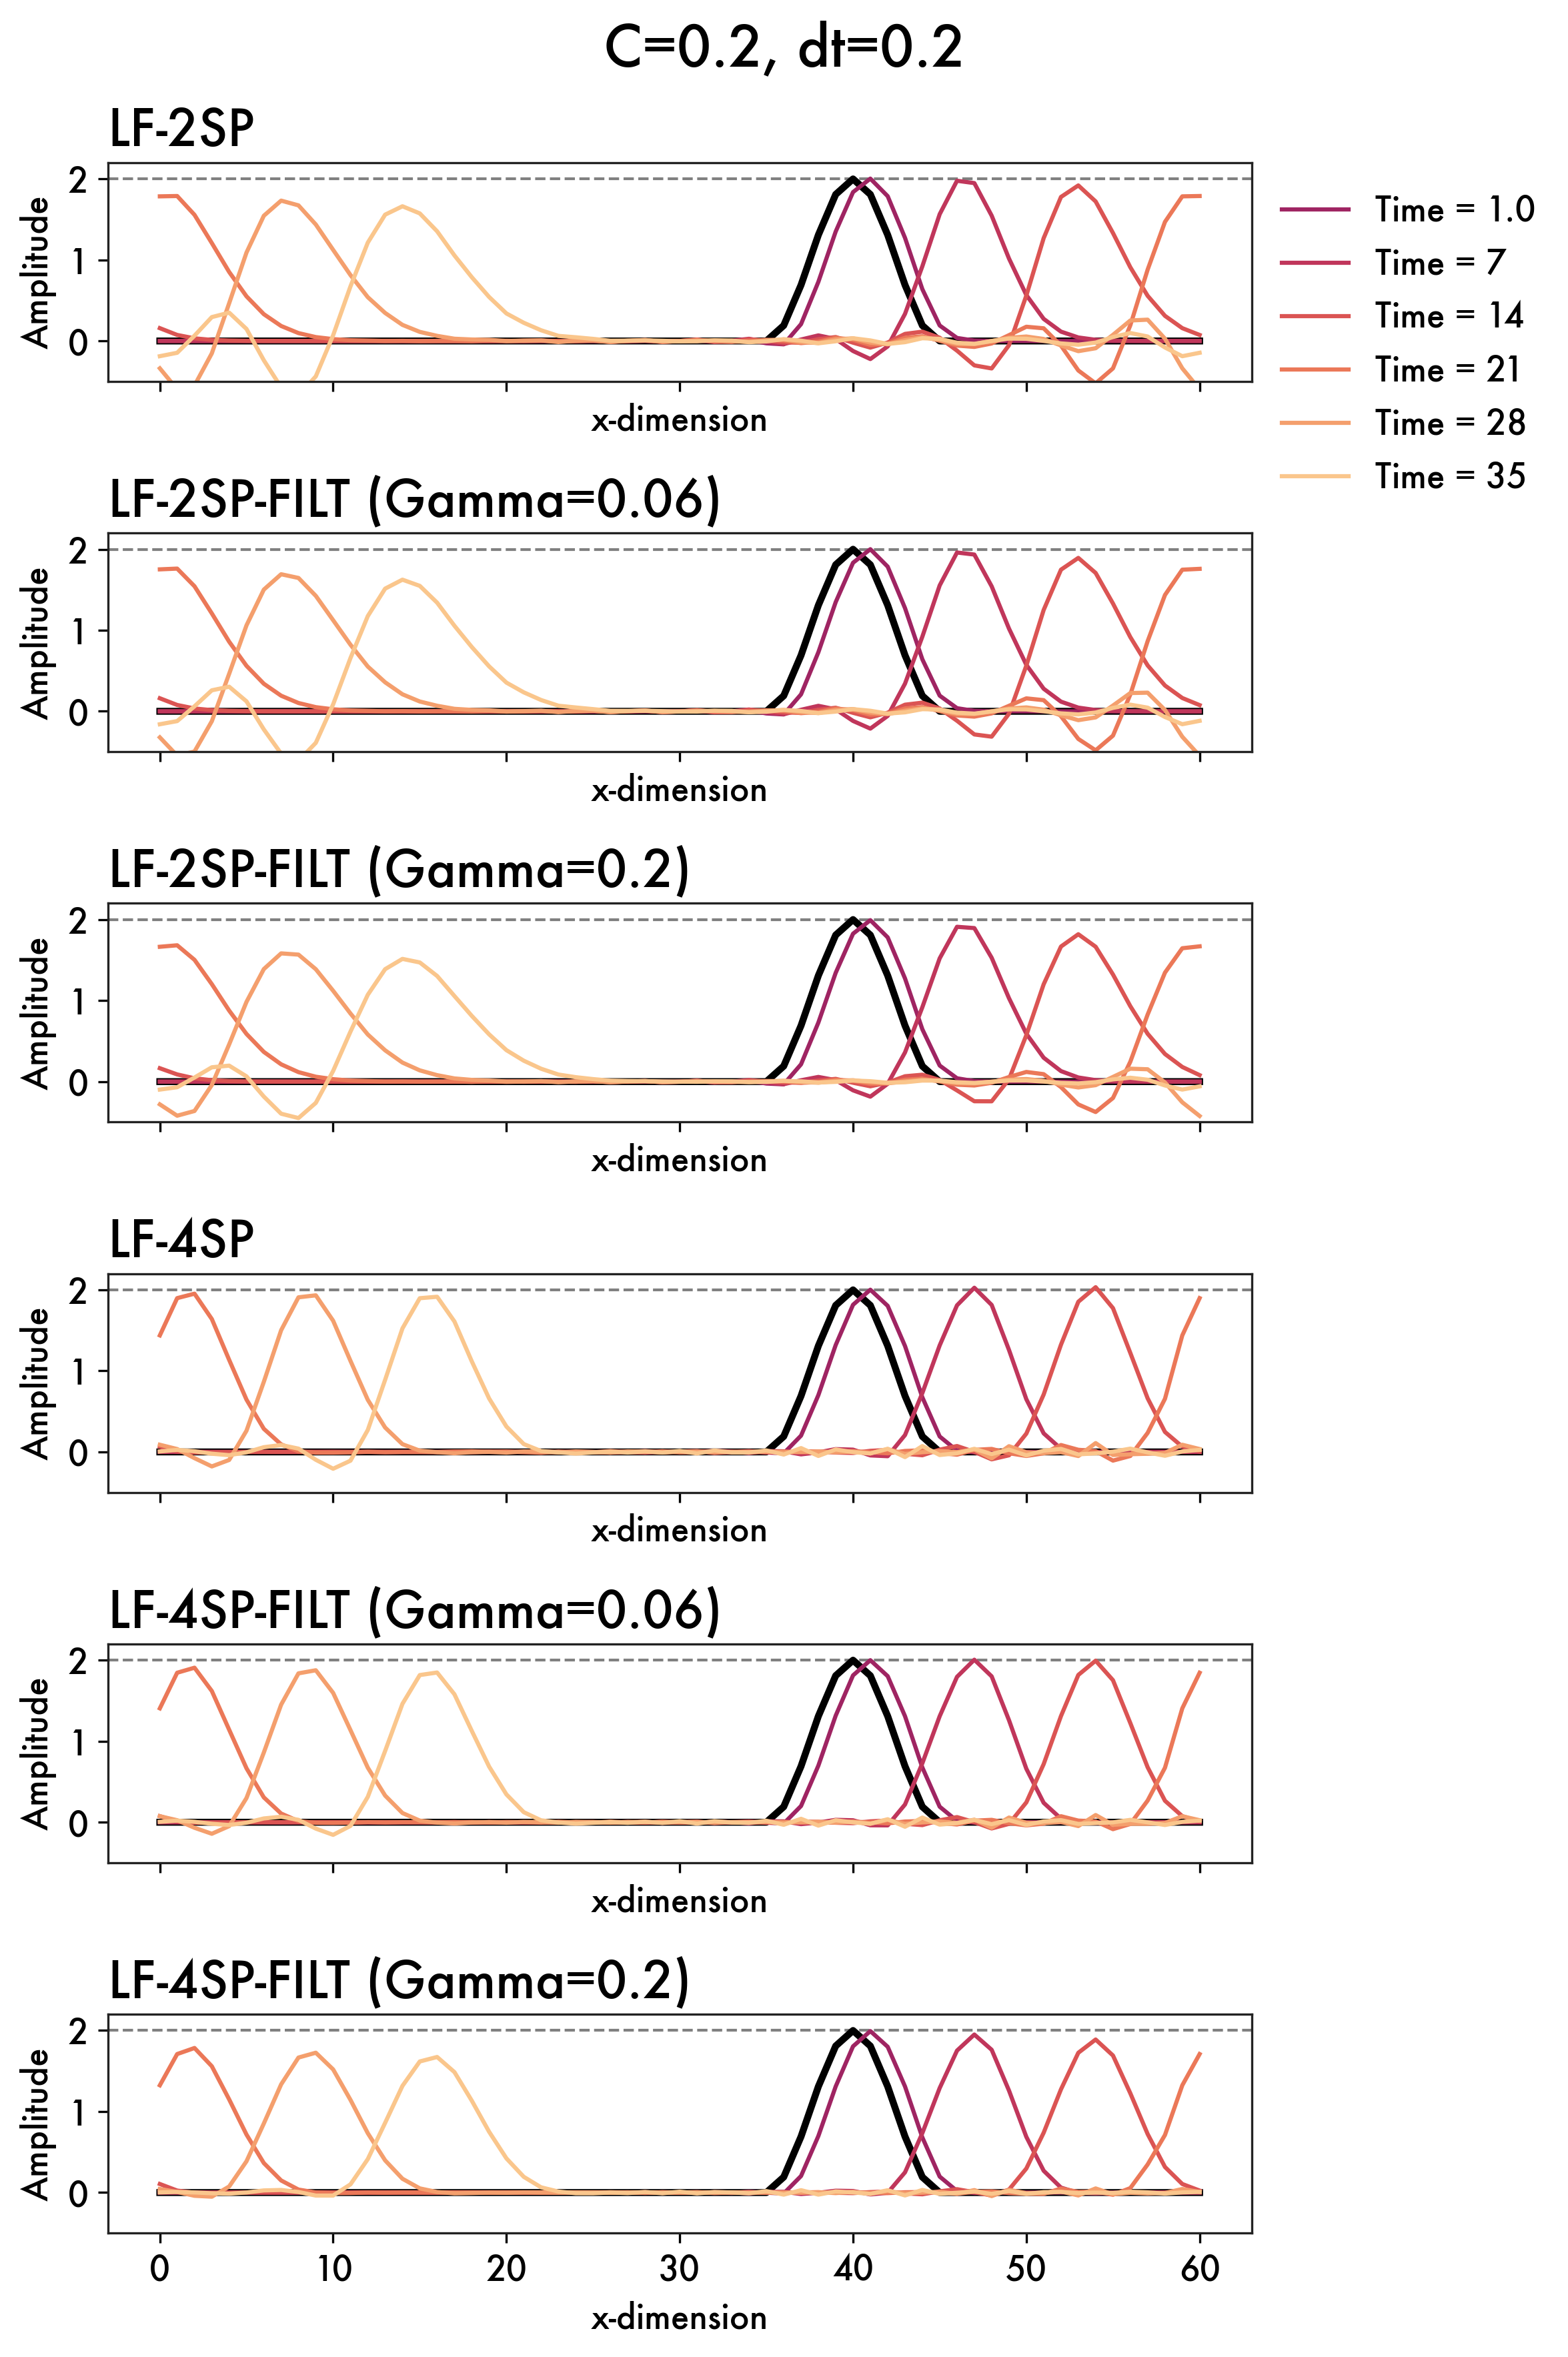

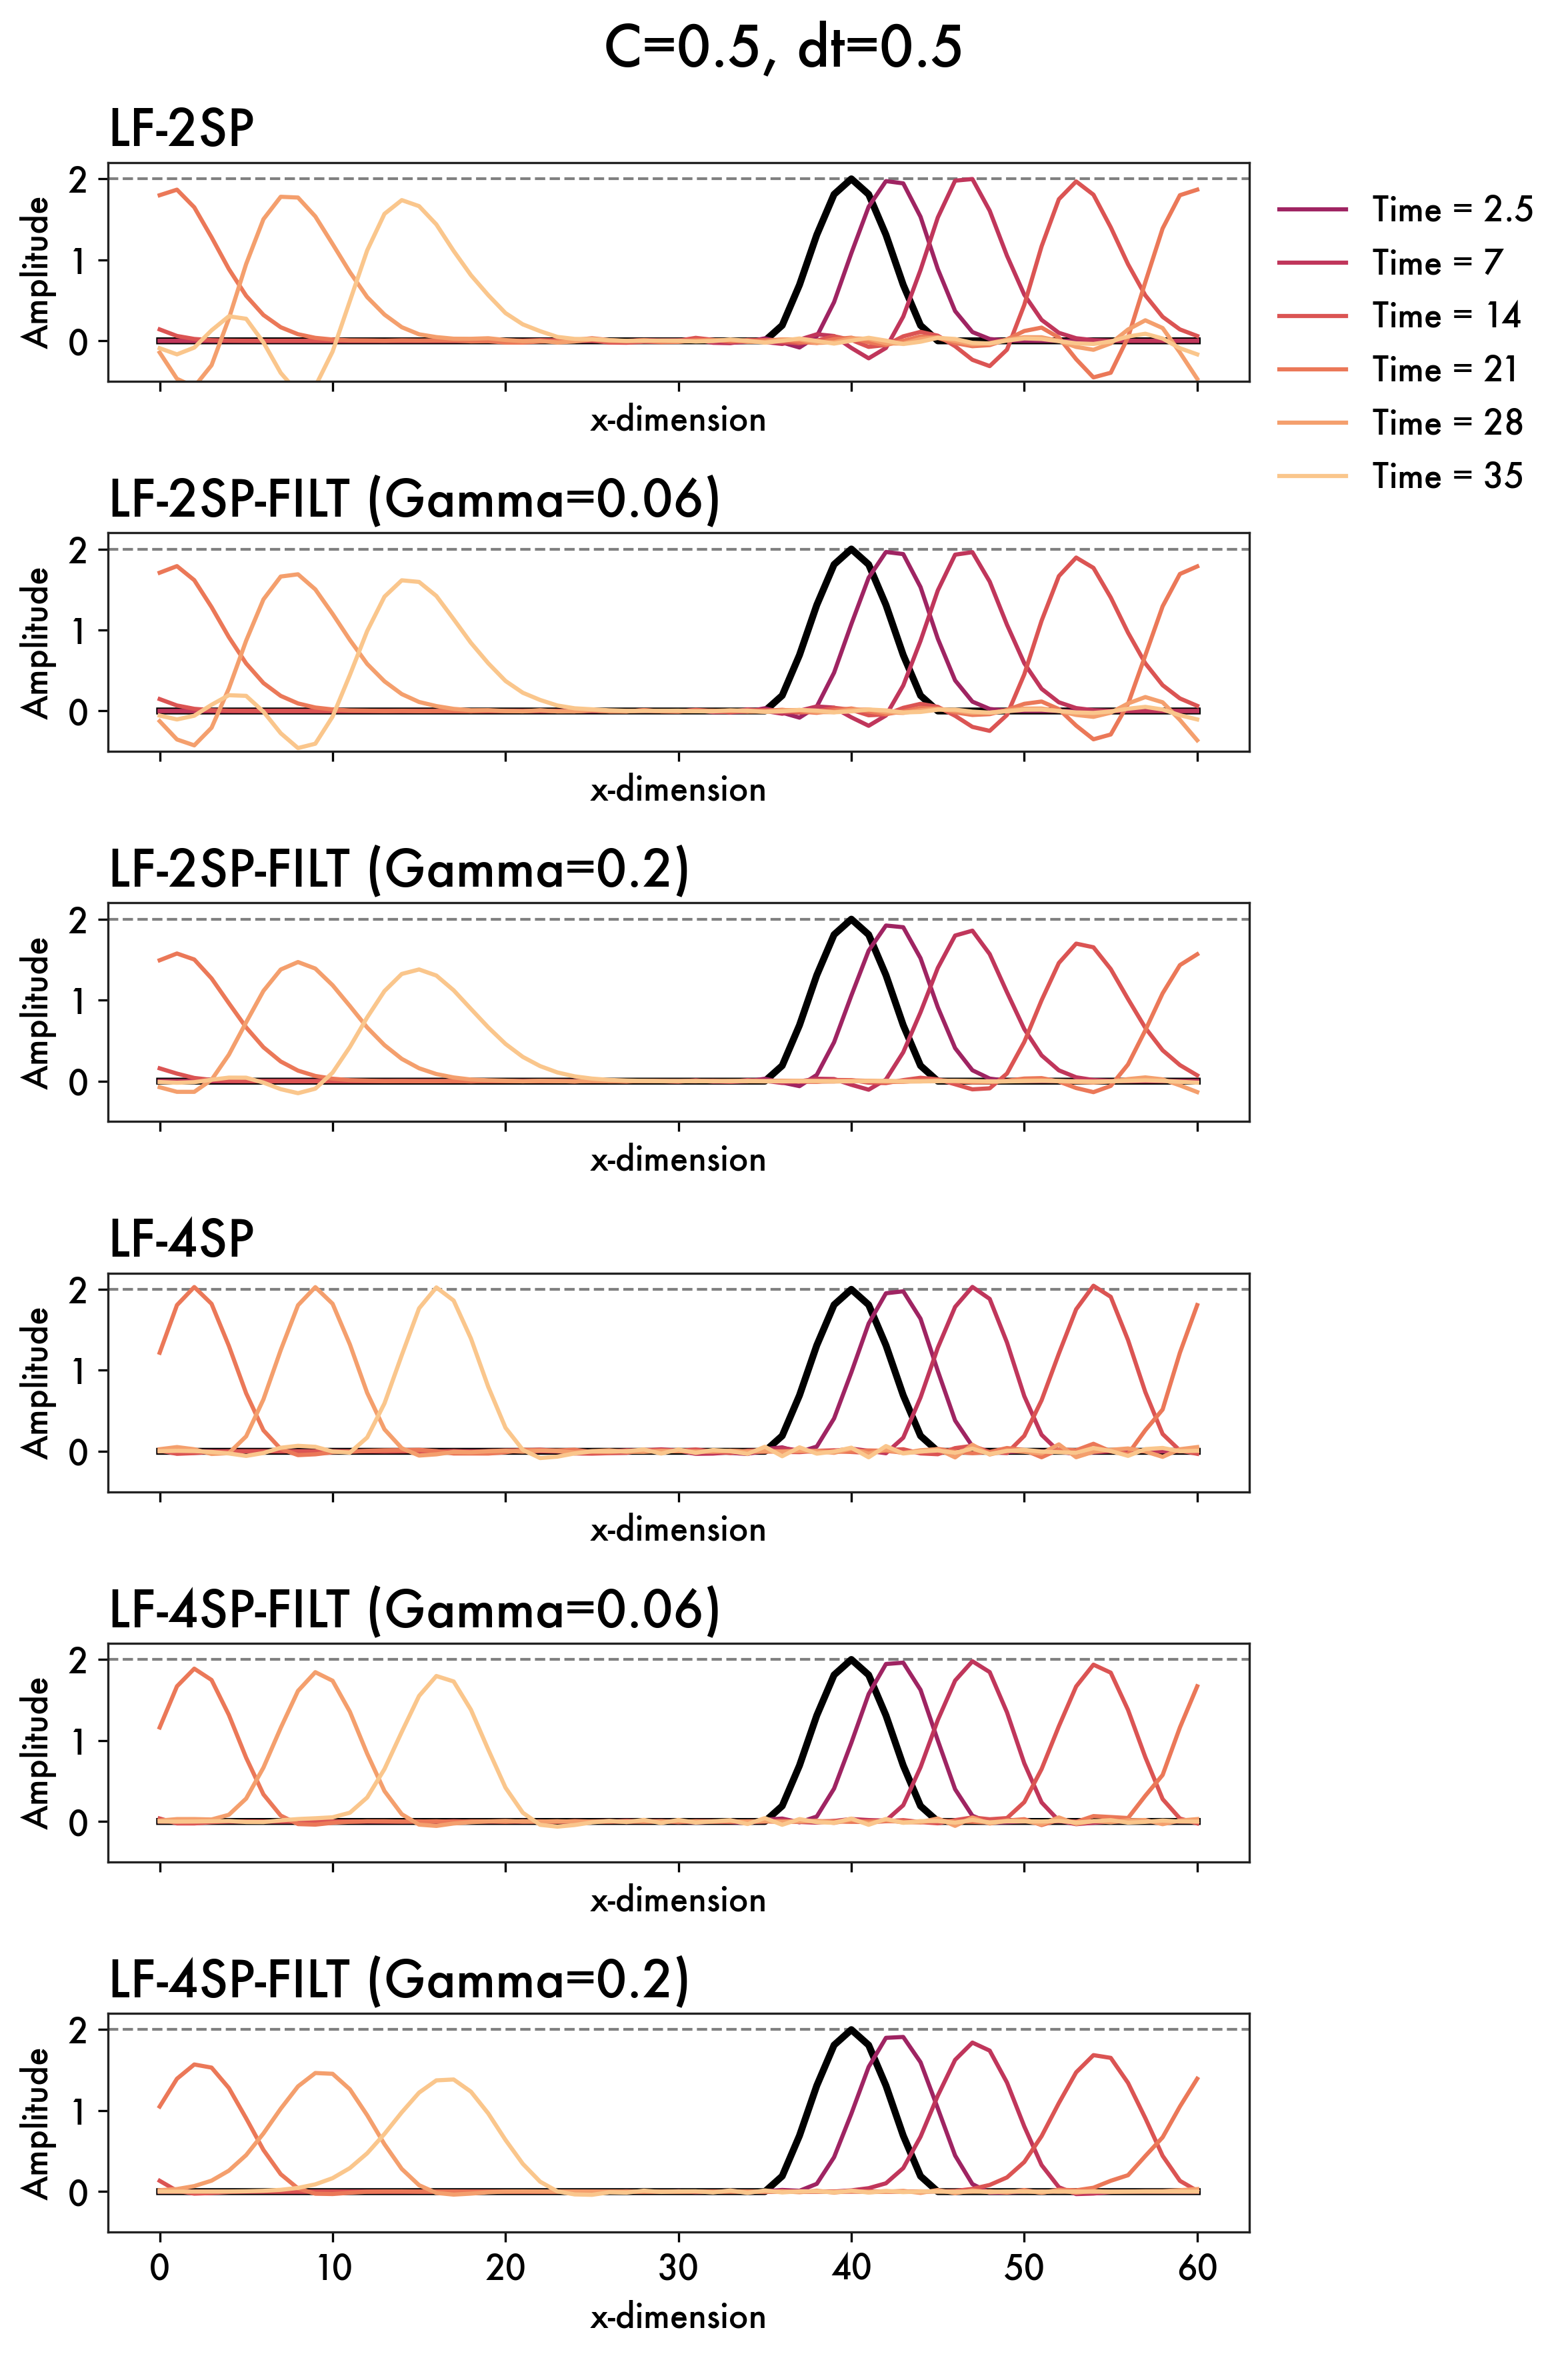

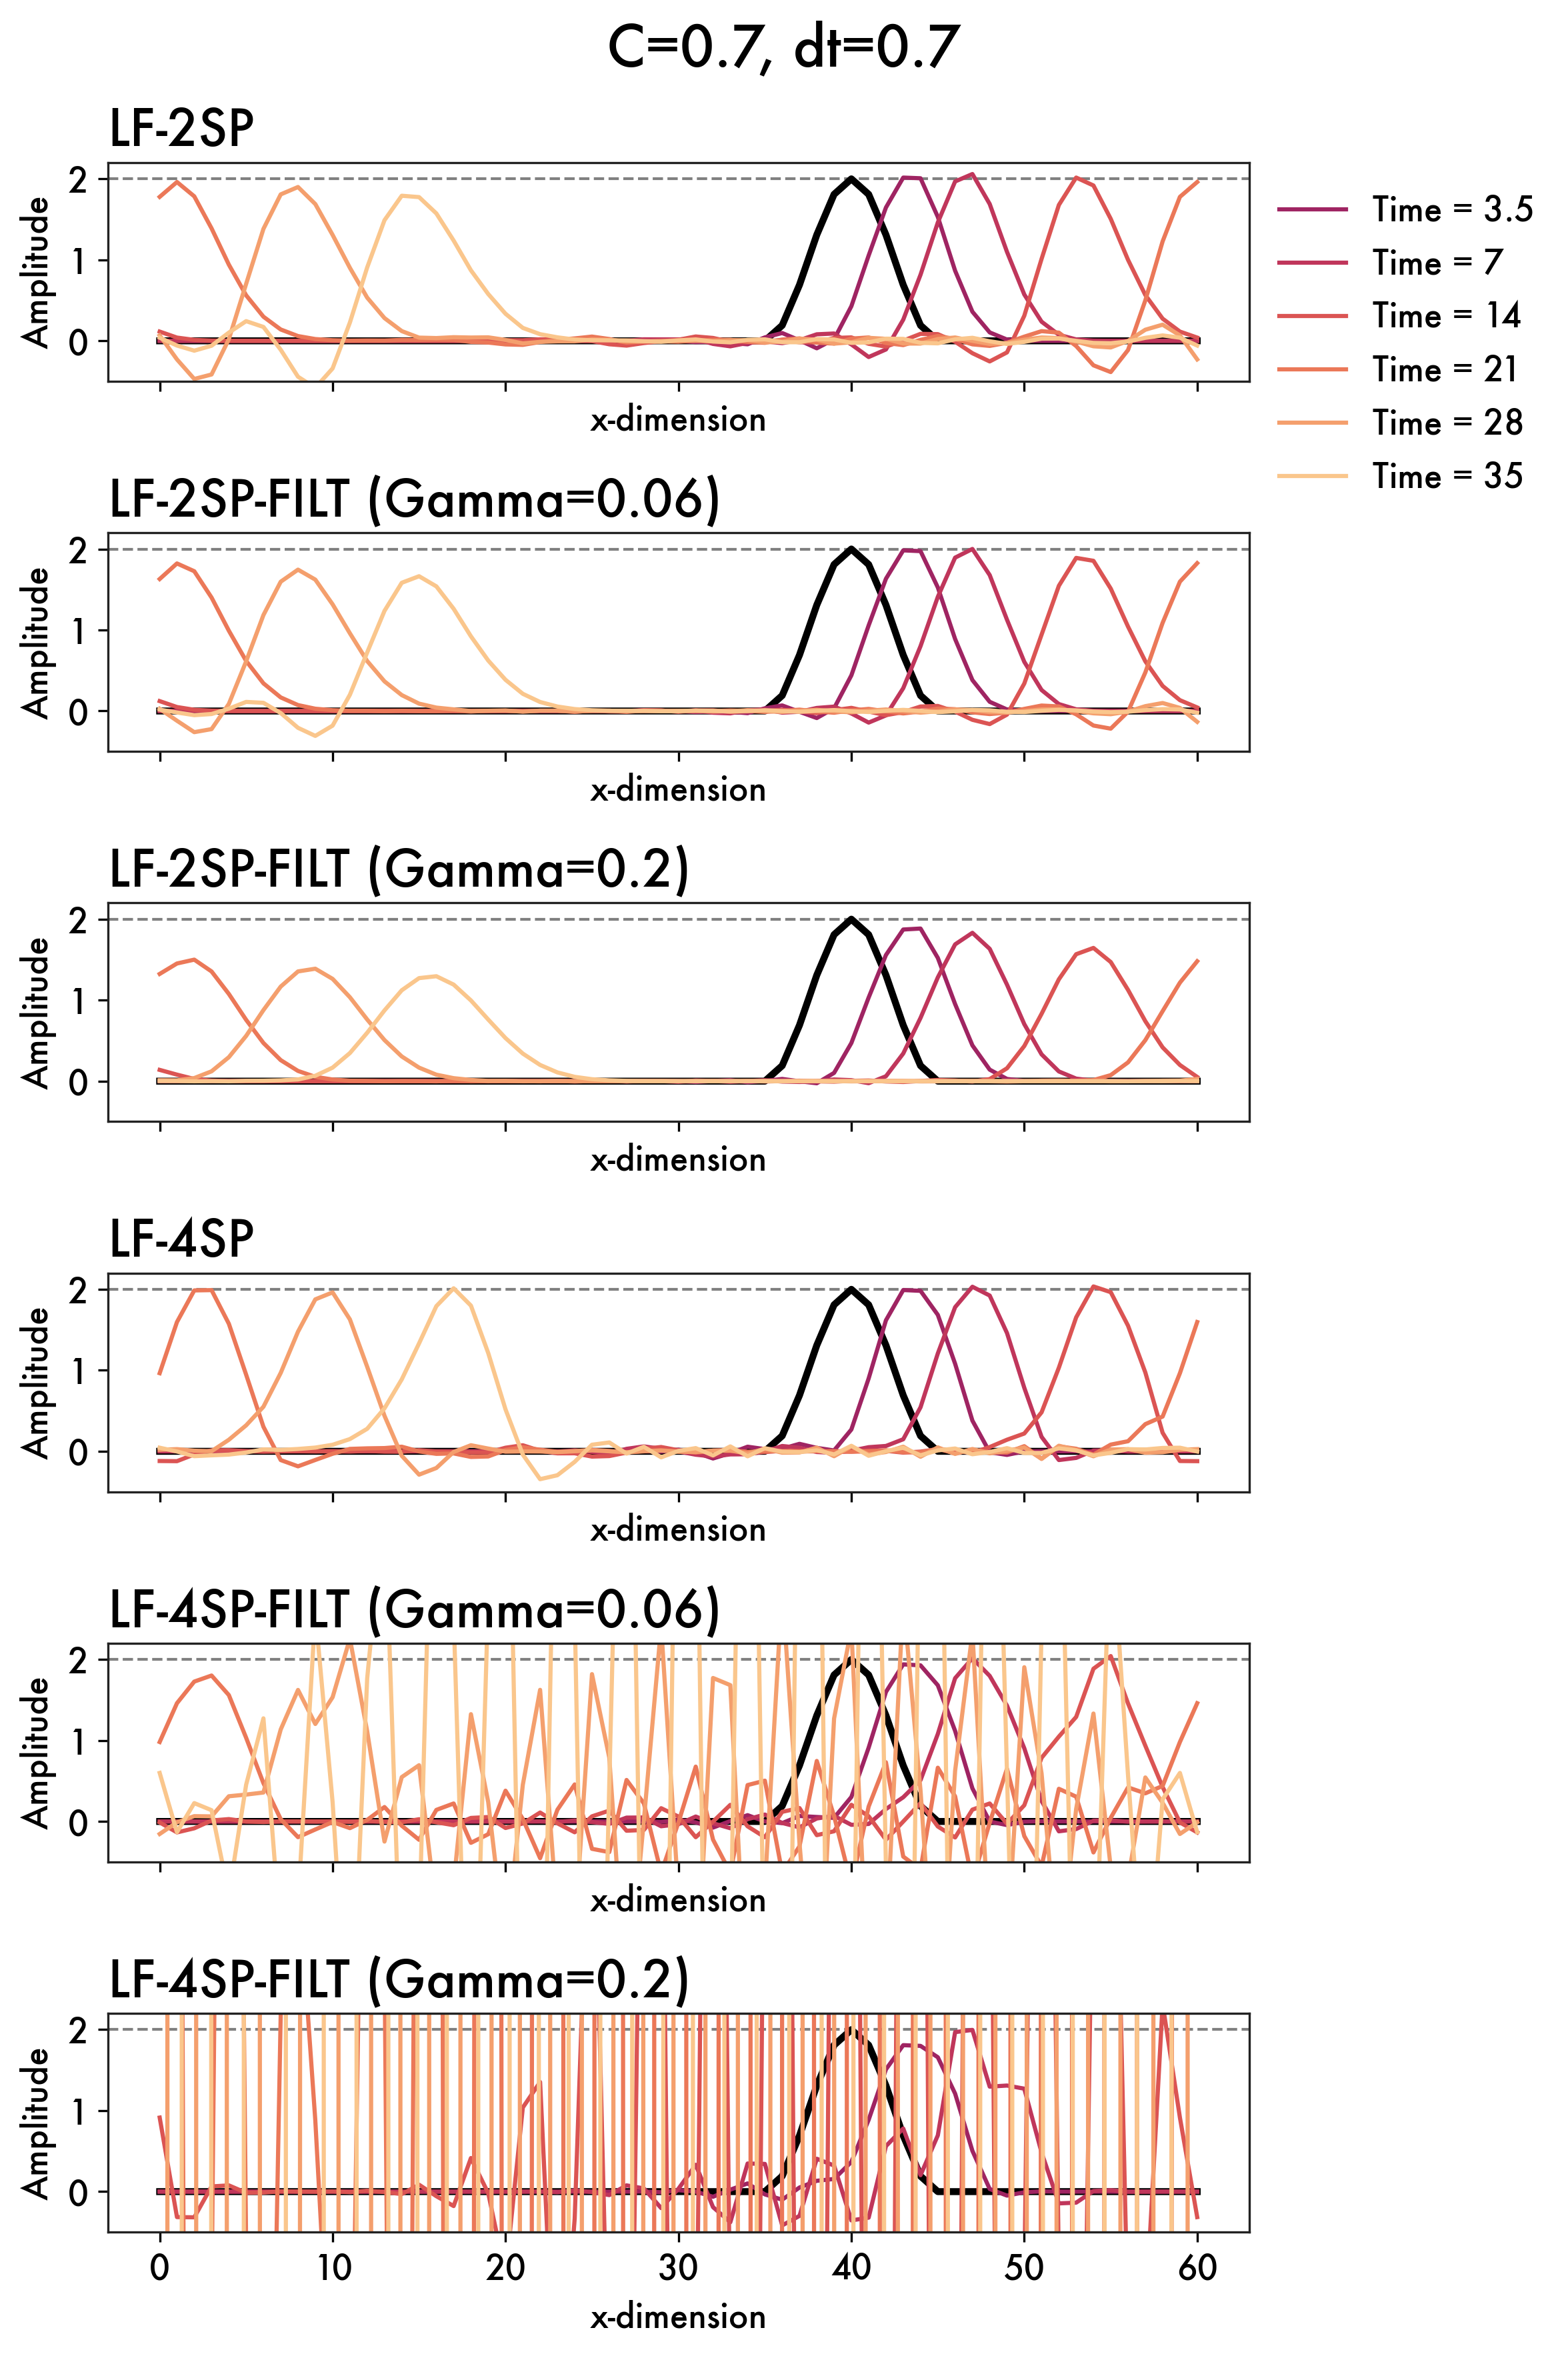

In [131]:
nx = 61
U = 1
dx = 1
a0 = 1
n = 10
k = 2 * np.pi / (n * dx)
xs = np.arange(nx)

for C in [0.2, 0.5, 0.7]:
    dt = (C * dx) / U
    nt = int(50 / dt)

    phi_lf2sp = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=2, gamma_filter=None
    )

    phi_lf2sp_filt_wk = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=2, gamma_filter=0.06
    )

    phi_lf2sp_filt_st = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=2, gamma_filter=0.2
    )

    phi_lf4sp = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=4, gamma_filter=None
    )

    phi_lf4sp_filt_wk = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=4, gamma_filter=0.06
    )

    phi_lf4sp_filt_st = model_main(
        nt, nx, dt, dx, U, a0, k, lforder=4, gamma_filter=0.2
    )

    fig, axes = plt.subplots(6, 1, figsize=(8, 12), sharex=True)

    for ax, phi, title in zip(
        axes,
        [
            phi_lf2sp,
            phi_lf2sp_filt_wk,
            phi_lf2sp_filt_st,
            phi_lf4sp,
            phi_lf4sp_filt_wk,
            phi_lf4sp_filt_st,
        ],
        [
            "LF-2SP",
            "LF-2SP-FILT (Gamma=0.06)",
            "LF-2SP-FILT (Gamma=0.2)",
            "LF-4SP",
            "LF-4SP-FILT (Gamma=0.06)",
            "LF-4SP-FILT (Gamma=0.2)",
        ],
    ):
        ax.plot(xs, phi[0], color="black")

        ax.plot(
            xs, phi[5], color=rainbow[-4], label=f"Time = {5*dt}", linewidth=1.5
        )

        for t, col in zip(
            [7, 14, 21, 28, 35],
            rainbow[4::-1],
        ):
            it = int(t / dt)
            ax.plot(xs, phi[it], color=col, label=f"Time = {t}", linewidth=1.5)

        ax.set_xlabel("x-dimension")
        ax.set_ylabel("Amplitude")

        ax.set_title(title)

        ax.axhline(2, ls="--", color="gray", lw=1, zorder=0)

        ax.set_ylim(-0.5, 2.2)

    axes[0].legend(bbox_to_anchor=(1, 1))

    plt.suptitle(f"C={C}, dt={dt}", fontsize=20)
    plt.show()
    plt.close("all")

In [16]:
nx = 61
U = 1
dx = 1
a0 = 1
n = 10
k = 2 * np.pi / (n * dx)
xs = np.arange(nx)

C = 0.2
dt = (C * dx) / U
nt = int(40 / dt)

phi_lf2sp = model_main(nt, nx, dt, dx, U, a0, k, lforder=2, gamma_filter=None)

phi_lf2sp_filt_wk = model_main(
    nt, nx, dt, dx, U, a0, k, lforder=2, gamma_filter=0.06
)

phi_lf2sp_filt_st = model_main(
    nt, nx, dt, dx, U, a0, k, lforder=2, gamma_filter=0.2
)

phi_lf4sp = model_main(nt, nx, dt, dx, U, a0, k, lforder=4, gamma_filter=None)

phi_lf4sp_filt_wk = model_main(
    nt, nx, dt, dx, U, a0, k, lforder=4, gamma_filter=0.06
)

phi_lf4sp_filt_st = model_main(
    nt, nx, dt, dx, U, a0, k, lforder=4, gamma_filter=0.2
)

for it in range(nt):
    fig, axes = plt.subplots(6, 1, figsize=(8, 12), sharex=True)

    for ax, phi, title in zip(
        axes,
        [
            phi_lf2sp,
            phi_lf2sp_filt_wk,
            phi_lf2sp_filt_st,
            phi_lf4sp,
            phi_lf4sp_filt_wk,
            phi_lf4sp_filt_st,
        ],
        [
            "LF-2SP",
            "LF-2SP-FILT (Gamma=0.06)",
            "LF-2SP-FILT (Gamma=0.2)",
            "LF-4SP",
            "LF-4SP-FILT (Gamma=0.06)",
            "LF-4SP-FILT (Gamma=0.2)",
        ],
    ):
        ax.plot(
            xs,
            phi[it],
            color="black",
            label=f"Time = {it*dt:.2f}",
            linewidth=1.5,
        )

        ax.set_xlabel("x-dimension")
        ax.set_ylabel("Amplitude")

        ax.set_title(title)

        ax.axhline(2, ls="--", color="gray", lw=1, zorder=0)

        ax.set_ylim(-0.5, 2.2)

    axes[0].legend(bbox_to_anchor=(1, 1))

    plt.suptitle(f"C={C}, dt={dt}", fontsize=20)
    plt.savefig(f"figures/c02/{(str(it)).zfill(3)}.png")
    plt.close("all")